# Feature selection via Pearson Correlation
相関係数による特徴選択手法  
Data : [House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  
Model : Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=0.4)

## Data Load 
### データ読み込み

In [2]:
file = pd.read_csv('../../data/train.csv')

In [3]:
file[0:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
data = file.drop('SalePrice', axis=1)
label = file['SalePrice']

## Data Preprocessing
### データ前処理

### 欠損値補間 & ダミー変数化

In [5]:
data_fill_nan = data.fillna(data.median())
data_with_dummy = pd.get_dummies(data_fill_nan)

## Cal Correlations
### 相関係数の計算

In [6]:
def correlation_ranker(X, y, K=10):
    cor_list = []
    feature_name = X.columns.tolist()
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    
    cor_list = np.array([0 if np.isnan(i) else i for i in cor_list])
    
    # feature name
    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-K:]].columns.tolist()
    # Filter mask
    cor_support = [True if i in cor_feature else False for i in feature_name]
    # Correlation Values
    cor_values = cor_list[np.argsort(np.abs(cor_list))[-K:].tolist()]
    
    return cor_support, cor_feature, cor_values

In [7]:
# K : 上位K個の相関係数の高いものを取得
K=10
cor_support, cor_feature, cor_values = correlation_ranker(data_with_dummy, label, K=K)

###  Plot Correlation

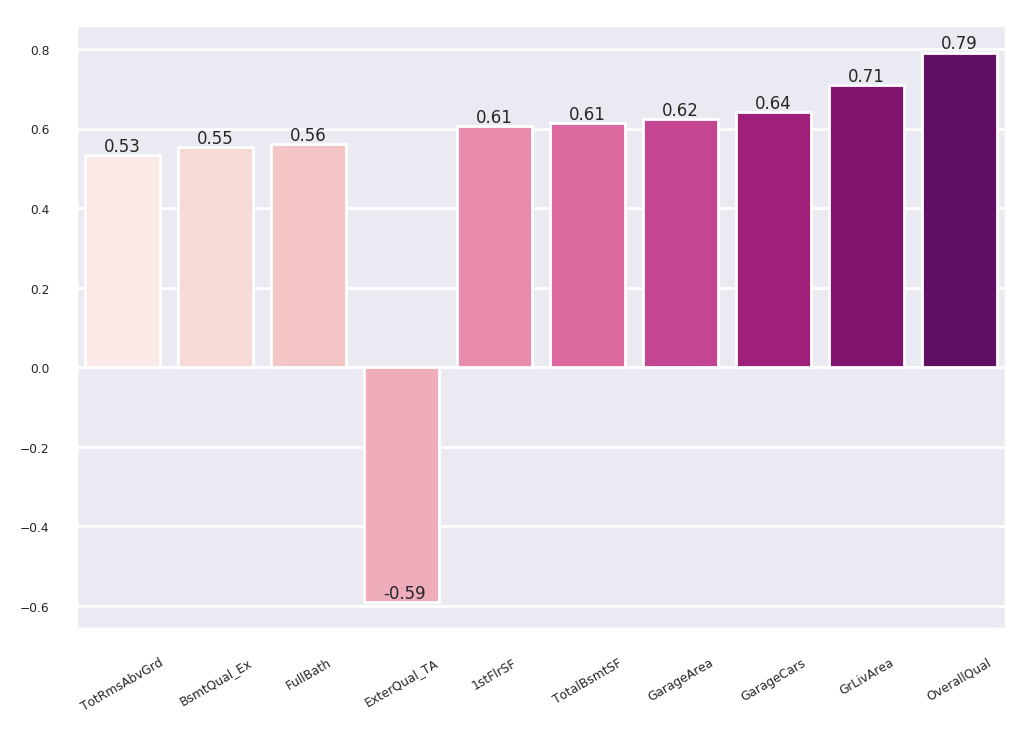

In [8]:
plt.figure(figsize=(6, 4), dpi=200)
graph = sns.barplot(cor_feature, cor_values, palette="RdPu")
plt.xticks(rotation=30)

# Add Text Label
for i in range(K):
    plt.text(x = i - 0.2 , y = cor_values[i] + 0.01, s = np.round(cor_values[i], 2), size = 6)

In [9]:
train_data = data_with_dummy[cor_feature]

In [10]:
data_with_dummy[cor_feature][0:5]

,TotRmsAbvGrd,BsmtQual_Ex,FullBath,ExterQual_TA,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,8,0,2,0,856,856,548,2,1710,7
1,6,0,2,1,1262,1262,460,2,1262,6
2,6,0,2,0,920,920,608,2,1786,7
3,7,0,1,1,961,756,642,3,1717,7
4,9,0,2,0,1145,1145,836,3,2198,8


### 相関プロット
#### 散布図 + 回帰直線

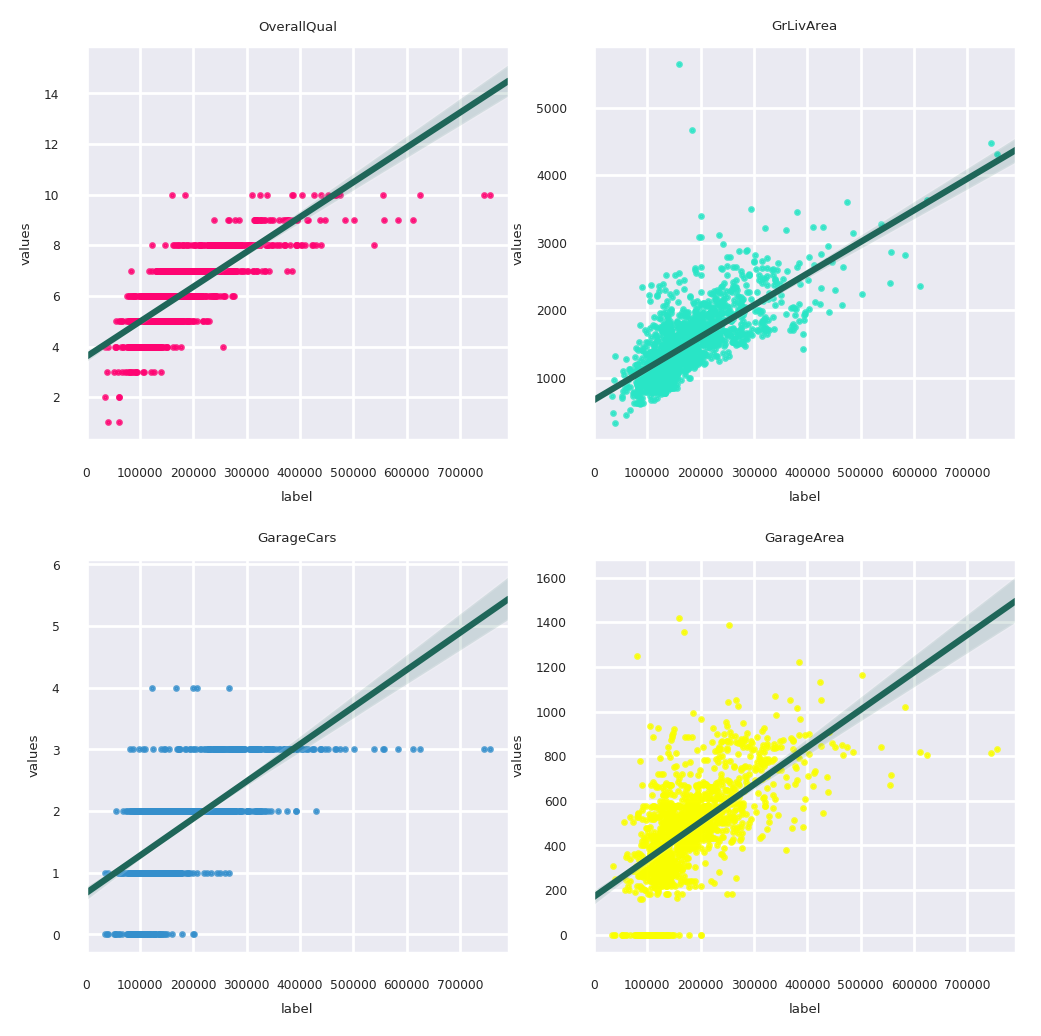

In [11]:
fig = plt.figure(figsize=(6, 6), dpi=200)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("OverallQual")
sns.regplot(x="label", y="values", 
            data = pd.DataFrame(np.vstack([data_with_dummy['OverallQual'], label]).T, columns=['values', 'label']),
            color="#ff0472",
            scatter_kws={'s': 2},
            line_kws={'color': '#1f6659'}
           )

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("GrLivArea")
sns.regplot(x="label", y="values",
            data = pd.DataFrame(np.vstack([data_with_dummy['GrLivArea'], label]).T, columns=['values', 'label']),
            color = "#29e5c6",
            scatter_kws={'s': 2},
            line_kws={'color': '#1f6659'}
           )

ax3 = fig.add_subplot(2,2,3)
ax3.set_title("GarageCars")
sns.regplot(x="label", y="values",
            data = pd.DataFrame(np.vstack([data_with_dummy['GarageCars'], label]).T, columns=['values', 'label']),
            color = "#358fcc",
            scatter_kws={'s': 2},
            line_kws={'color': '#1f6659'}
           )

ax4 = fig.add_subplot(2,2,4)
ax4.set_title("GarageArea")
sns.regplot(x="label", y="values",
            data = pd.DataFrame(np.vstack([data_with_dummy['GarageArea'], label]).T, columns=['values', 'label']),
            color = "#faff00",
            scatter_kws={'s': 2},
            line_kws={'color': '#1f6659'}
           )


## Regression Task

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

### Top 1-10 feature
上位 1-10のモデルで線形回帰した場合の誤差(negative MSE)

In [13]:
results = pd.DataFrame()
for i in range(len(cor_feature)):
    input_data  = data_with_dummy[cor_feature[0:i+1]]
    linear_regression = LinearRegression()
    lin_reg_pipe = Pipeline([('lin_model', linear_regression)])
    scores = cross_val_score(lin_reg_pipe, input_data, label, cv=5, scoring='neg_mean_squared_error')
    results = results.append(pd.DataFrame([scores]))

results = results.reset_index(drop=True)

### All feature
全特徴量を用いた場合

In [14]:
input_data = data_with_dummy
linear_regression = LinearRegression()
lin_reg_pipe = Pipeline([('lin_model', linear_regression)])
scores = cross_val_score(lin_reg_pipe, input_data, label, cv=5, scoring='neg_mean_squared_error')
results = results.append(pd.DataFrame([scores]))

results = results.reset_index(drop=True)

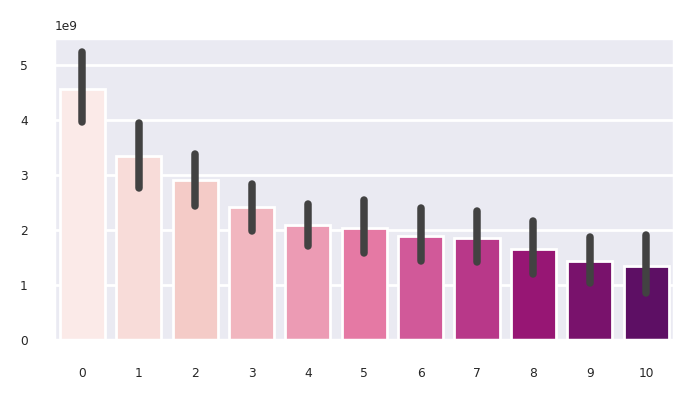

In [15]:
fig = plt.figure(figsize=(4, 2), dpi=200)
sns.barplot(data=-results.T, palette='RdPu')